In [1]:
from nn.nn import NN
import gymnasium as gym
from agent.agent import AgentBuilder, ActionContext
from experience.experience import ExperienceBuffer
import torch
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from PIL import Image


In [2]:
ENV_NAME = 'LunarLander-v2'
EPSILON = 1
EPSILON_DECAY = 20000
#EPSILON_DECAY = 1000
EPSILON_DECAY_VALUE = 0.01 
POLICY = 'GREEDY'
ACTION_METHOD = 'NEURAL_NETWORK'
EXPERIENCE_BUFFER = 1000000000 #not bounded
#EXPERIENCE_BUFFER = 150
#SAMPLE_SIZE = 120
SAMPLE_SIZE = 64
#SYNCHRONIZATION_RATE = 60
SYNCHRONIZATION_RATE = 30
LEARNING_RATE = 0.001
GAMMA = 0.99
#HIDDEN_DIMENSION = (128, 128, 64)
HIDDEN_DIMENSION = (64, 64)
A_FUNCTION = torch.nn.ReLU()
LOSS_F=torch.nn.MSELoss()
OPTIMIZER=torch.optim.Adam
EPISODES_TO_PLAY = 1000
#STEPS_TO_PLAY = 3000

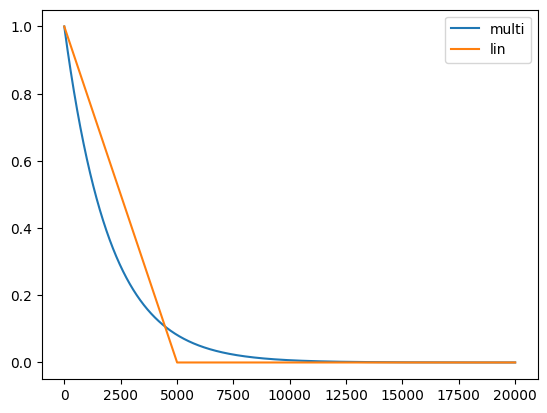

In [3]:
vals = [1]
epsilon = 1
epsilon_decay_value = 0
diff = epsilon - epsilon_decay_value
epsilon_decay = 5000
epsilons = []
for i in range(20000):
    vals.append(vals[-1]*0.9995)
    epsilons.append((epsilon - diff/epsilon_decay * i) if epsilon_decay >= i else 0)
    
plt.plot(vals, label = 'multi')
plt.plot(epsilons, label = 'lin')
plt.legend()
plt.show()

Create environment to play with:

In [4]:
env = gym.make(
    ENV_NAME,
    continuous = False,
    gravity = -10.0,
    enable_wind = False,
    wind_power = 15.0,
    turbulence_power = 1.5,
    render_mode="rgb_array"
    )

#state description: 8-dimensional vector: 
#    the coordinates of the lander in x & y, 
#    its linear velocities in x & y, 
#    its angle, its angular velocity, 
#    two booleans that represent whether each leg is in contact with the ground or not.

starting_state, _ = env.reset()

Create prediction/on-line neural network.

In [5]:

nn = NN(
    nb_of_state_variables = 8,
    nb_of_output_values= env.action_space.n,
    activation_functions= A_FUNCTION,
    hidden_dims=HIDDEN_DIMENSION,
    add_biases=True
    )


In [6]:
exp = ExperienceBuffer(
    size_of_buffer=EXPERIENCE_BUFFER, 
    sampling_method='SIMPLE_RANDOM'
    )

In [7]:

action_context = ActionContext(
    actions_number=env.action_space.n,
    action_methods=ACTION_METHOD,
    epsilon = EPSILON,
    nn = nn,
    policy= POLICY,
    epsilon_decay=EPSILON_DECAY,
    epsilon_decay_value=EPSILON_DECAY_VALUE
)

agent = AgentBuilder(
    action_context,
    env=env,
    gamma=GAMMA,
    loss_function=LOSS_F,
    optimizer=OPTIMIZER,
    learning_rate=LEARNING_RATE,
    synchronization = SYNCHRONIZATION_RATE # after how many step synchronization will be made
    ).build_agent()


In [8]:
def save_visuals(env_, frames):
    # Save the current game visuals
    frame = env_.render()
    frames.append(frame)

def save_frames_as_gif(episode_id, frames):
    gif = Image.fromarray(np.copy(frames[0]))
       
    gif_name = 'lunar_lander_{}.gif'.format(episode_id)

    gif.save(
        gif_name,
        append_images=list(map(lambda im: Image.fromarray(im), frames[1:])),
        save_all=True, duration=5, loop=0
    )

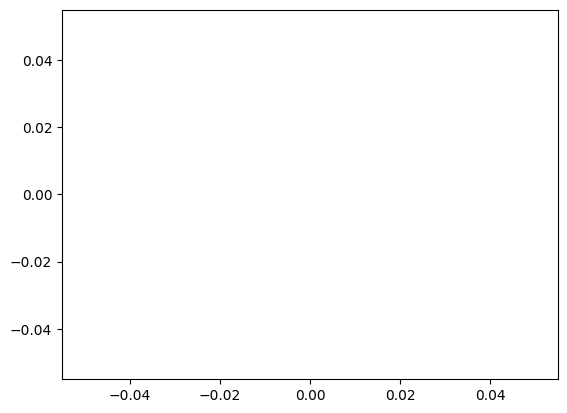

Episode nb: 0, Steps: 80, Score: -131.14, Mean_of_last_scores: -131.14, Total_steps: 79, Current reward: -100.00
Episode nb: 1, Steps: 82, Score: -118.57, Mean_of_last_scores: -124.85, Total_steps: 161, Current reward: -100.00
Episode nb: 2, Steps: 104, Score: -268.21, Mean_of_last_scores: -172.64, Total_steps: 265, Current reward: -100.00
Episode nb: 3, Steps: 97, Score: -211.93, Mean_of_last_scores: -182.46, Total_steps: 362, Current reward: -100.00
Episode nb: 4, Steps: 94, Score: -303.25, Mean_of_last_scores: -206.62, Total_steps: 456, Current reward: -100.00
Episode nb: 5, Steps: 71, Score: -73.15, Mean_of_last_scores: -184.38, Total_steps: 527, Current reward: -100.00
Episode nb: 6, Steps: 91, Score: -261.01, Mean_of_last_scores: -195.32, Total_steps: 618, Current reward: -100.00
Episode nb: 7, Steps: 71, Score: -198.63, Mean_of_last_scores: -195.74, Total_steps: 689, Current reward: -100.00
Episode nb: 8, Steps: 71, Score: -107.31, Mean_of_last_scores: -185.91, Total_steps: 760,

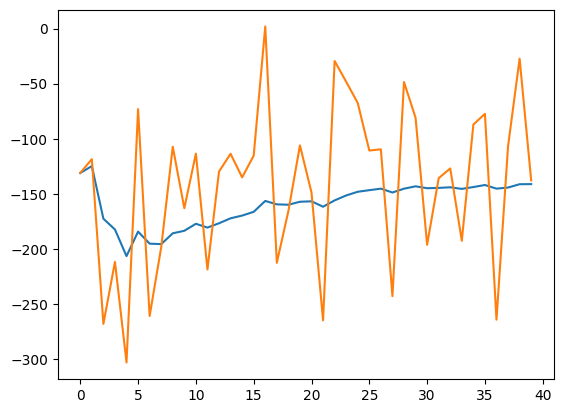

Episode nb: 40, Steps: 108, Score: -134.16, Mean_of_last_scores: -141.07, Total_steps: 3667, Current reward: -100.00
Episode nb: 41, Steps: 110, Score: -329.44, Mean_of_last_scores: -145.56, Total_steps: 3777, Current reward: -100.00
Episode nb: 42, Steps: 117, Score: -107.55, Mean_of_last_scores: -144.68, Total_steps: 3894, Current reward: -100.00
Episode nb: 43, Steps: 127, Score: -112.20, Mean_of_last_scores: -143.94, Total_steps: 4021, Current reward: -100.00
Episode nb: 44, Steps: 110, Score: -290.14, Mean_of_last_scores: -147.19, Total_steps: 4131, Current reward: -100.00
Episode nb: 45, Steps: 62, Score: -58.01, Mean_of_last_scores: -145.25, Total_steps: 4193, Current reward: -100.00
Episode nb: 46, Steps: 114, Score: -191.40, Mean_of_last_scores: -146.23, Total_steps: 4307, Current reward: -100.00
Episode nb: 47, Steps: 89, Score: -91.12, Mean_of_last_scores: -145.08, Total_steps: 4396, Current reward: -100.00
Episode nb: 48, Steps: 71, Score: -146.40, Mean_of_last_scores: -145

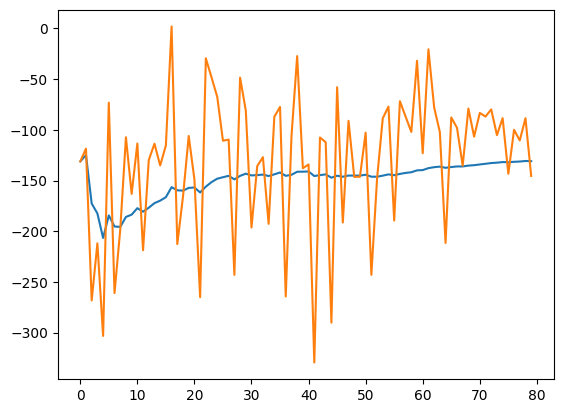

Episode nb: 80, Steps: 100, Score: -185.06, Mean_of_last_scores: -131.57, Total_steps: 7567, Current reward: -100.00
Episode nb: 81, Steps: 146, Score: -94.27, Mean_of_last_scores: -131.11, Total_steps: 7713, Current reward: -100.00
Episode nb: 82, Steps: 115, Score: -105.11, Mean_of_last_scores: -130.80, Total_steps: 7828, Current reward: -100.00
Episode nb: 83, Steps: 61, Score: -203.36, Mean_of_last_scores: -131.66, Total_steps: 7889, Current reward: -100.00
Episode nb: 84, Steps: 91, Score: -39.25, Mean_of_last_scores: -130.58, Total_steps: 7980, Current reward: -100.00
Episode nb: 85, Steps: 86, Score: -108.05, Mean_of_last_scores: -130.31, Total_steps: 8066, Current reward: -100.00
Episode nb: 86, Steps: 79, Score: -85.30, Mean_of_last_scores: -129.80, Total_steps: 8145, Current reward: -100.00
Episode nb: 87, Steps: 74, Score: -33.23, Mean_of_last_scores: -128.70, Total_steps: 8219, Current reward: -100.00
Episode nb: 88, Steps: 132, Score: -100.47, Mean_of_last_scores: -128.38,

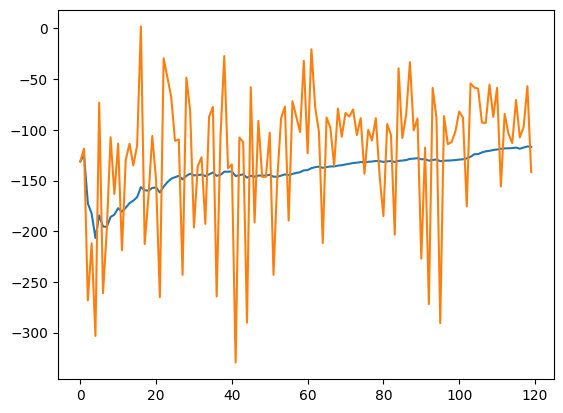

Episode nb: 120, Steps: 82, Score: -130.38, Mean_of_last_scores: -116.55, Total_steps: 11901, Current reward: -100.00
Episode nb: 121, Steps: 101, Score: -35.18, Mean_of_last_scores: -114.25, Total_steps: 12002, Current reward: -100.00
Episode nb: 122, Steps: 76, Score: -66.41, Mean_of_last_scores: -114.62, Total_steps: 12078, Current reward: -100.00
Episode nb: 123, Steps: 92, Score: -59.74, Mean_of_last_scores: -114.73, Total_steps: 12170, Current reward: -100.00
Episode nb: 124, Steps: 94, Score: -94.81, Mean_of_last_scores: -115.00, Total_steps: 12264, Current reward: -100.00
Episode nb: 125, Steps: 113, Score: -147.06, Mean_of_last_scores: -115.37, Total_steps: 12377, Current reward: -100.00
Episode nb: 126, Steps: 81, Score: -127.30, Mean_of_last_scores: -115.54, Total_steps: 12458, Current reward: -100.00
Episode nb: 127, Steps: 67, Score: -80.79, Mean_of_last_scores: -113.92, Total_steps: 12525, Current reward: -100.00
Episode nb: 128, Steps: 182, Score: -65.49, Mean_of_last_sc

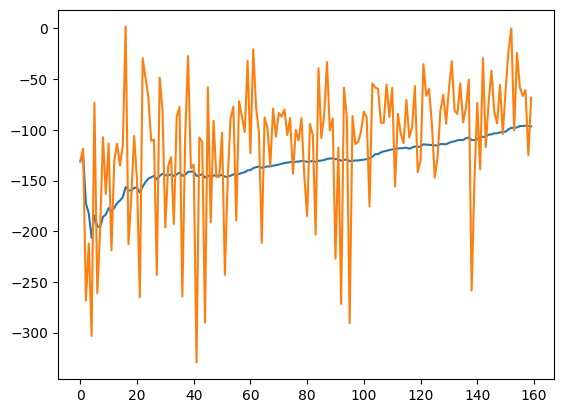

Episode nb: 160, Steps: 196, Score: -155.78, Mean_of_last_scores: -96.89, Total_steps: 16452, Current reward: -100.00
Episode nb: 161, Steps: 117, Score: -77.02, Mean_of_last_scores: -97.45, Total_steps: 16569, Current reward: -100.00
Episode nb: 162, Steps: 157, Score: -5.86, Mean_of_last_scores: -96.73, Total_steps: 16726, Current reward: -100.00
Episode nb: 163, Steps: 83, Score: -84.60, Mean_of_last_scores: -96.56, Total_steps: 16809, Current reward: -100.00
Episode nb: 164, Steps: 102, Score: -70.04, Mean_of_last_scores: -95.14, Total_steps: 16911, Current reward: -100.00
Episode nb: 165, Steps: 117, Score: -86.30, Mean_of_last_scores: -95.13, Total_steps: 17028, Current reward: -100.00
Episode nb: 166, Steps: 147, Score: -44.57, Mean_of_last_scores: -94.59, Total_steps: 17175, Current reward: -100.00
Episode nb: 167, Steps: 127, Score: -55.66, Mean_of_last_scores: -93.80, Total_steps: 17302, Current reward: -100.00
Episode nb: 168, Steps: 71, Score: -39.21, Mean_of_last_scores: -

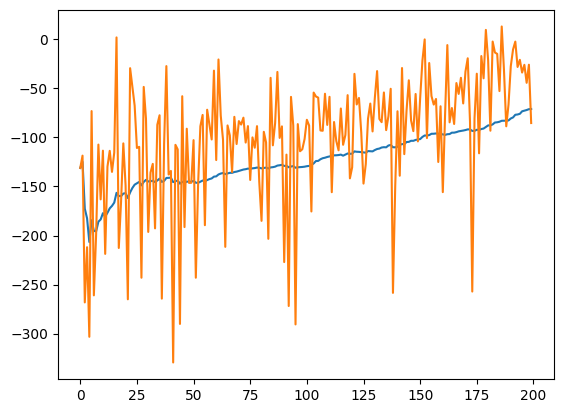

Episode nb: 200, Steps: 106, Score: -221.58, Mean_of_last_scores: -72.43, Total_steps: 21332, Current reward: -100.00
Episode nb: 201, Steps: 93, Score: -78.13, Mean_of_last_scores: -72.34, Total_steps: 21425, Current reward: -100.00
Episode nb: 202, Steps: 115, Score: -14.92, Mean_of_last_scores: -70.73, Total_steps: 21540, Current reward: -100.00
Episode nb: 203, Steps: 207, Score: -228.78, Mean_of_last_scores: -72.48, Total_steps: 21747, Current reward: -100.00
Episode nb: 204, Steps: 109, Score: -44.30, Mean_of_last_scores: -72.34, Total_steps: 21856, Current reward: -100.00
Episode nb: 205, Steps: 158, Score: -60.44, Mean_of_last_scores: -72.35, Total_steps: 22014, Current reward: -100.00
Episode nb: 206, Steps: 104, Score: -75.89, Mean_of_last_scores: -72.18, Total_steps: 22118, Current reward: -100.00
Episode nb: 207, Steps: 124, Score: -55.92, Mean_of_last_scores: -71.80, Total_steps: 22242, Current reward: -100.00
Episode nb: 208, Steps: 161, Score: -47.32, Mean_of_last_scores

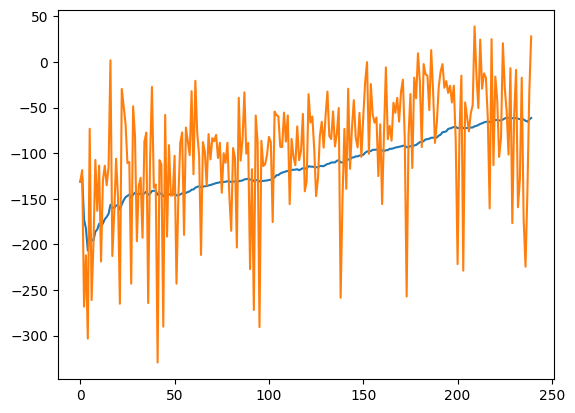

Episode nb: 240, Steps: 687, Score: -201.63, Mean_of_last_scores: -62.57, Total_steps: 33625, Current reward: -100.00
Episode nb: 241, Steps: 389, Score: -147.27, Mean_of_last_scores: -62.66, Total_steps: 34014, Current reward: -100.00
Episode nb: 242, Steps: 1001, Score: -207.03, Mean_of_last_scores: -64.43, Total_steps: 35015, Current reward: -100.00
Episode nb: 243, Steps: 1001, Score: -110.20, Mean_of_last_scores: -64.37, Total_steps: 36016, Current reward: -100.00
Episode nb: 244, Steps: 1001, Score: -163.96, Mean_of_last_scores: -65.28, Total_steps: 37017, Current reward: -100.00
Episode nb: 245, Steps: 1001, Score: -137.43, Mean_of_last_scores: -66.24, Total_steps: 38018, Current reward: -100.00
Episode nb: 246, Steps: 168, Score: 4.62, Mean_of_last_scores: -65.37, Total_steps: 38186, Current reward: -100.00
Episode nb: 247, Steps: 521, Score: -160.11, Mean_of_last_scores: -66.03, Total_steps: 38707, Current reward: -100.00
Episode nb: 248, Steps: 587, Score: -239.51, Mean_of_la

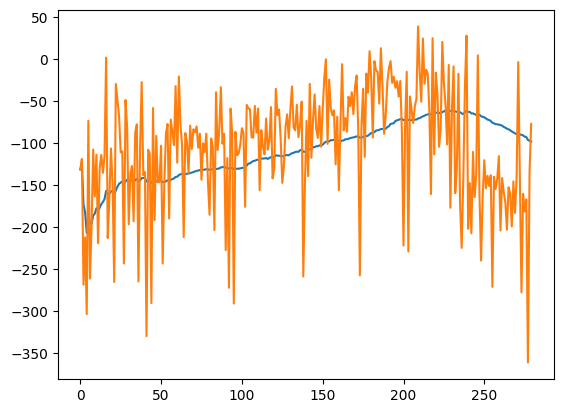

Episode nb: 280, Steps: 1001, Score: -125.62, Mean_of_last_scores: -98.85, Total_steps: 65528, Current reward: -100.00
Episode nb: 281, Steps: 846, Score: 139.94, Mean_of_last_scores: -96.52, Total_steps: 66374, Current reward: 100.00
Episode nb: 282, Steps: 706, Score: 164.89, Mean_of_last_scores: -94.85, Total_steps: 67080, Current reward: 100.00
Episode nb: 283, Steps: 876, Score: -124.46, Mean_of_last_scores: -95.96, Total_steps: 67956, Current reward: -100.00
Episode nb: 284, Steps: 1001, Score: -110.98, Mean_of_last_scores: -96.92, Total_steps: 68957, Current reward: -100.00
Episode nb: 285, Steps: 698, Score: 190.40, Mean_of_last_scores: -94.49, Total_steps: 69655, Current reward: 100.00
Episode nb: 286, Steps: 335, Score: -44.22, Mean_of_last_scores: -95.06, Total_steps: 69990, Current reward: -100.00
Episode nb: 287, Steps: 1001, Score: -149.39, Mean_of_last_scores: -96.24, Total_steps: 70991, Current reward: -100.00
Episode nb: 288, Steps: 806, Score: 131.65, Mean_of_last_sco

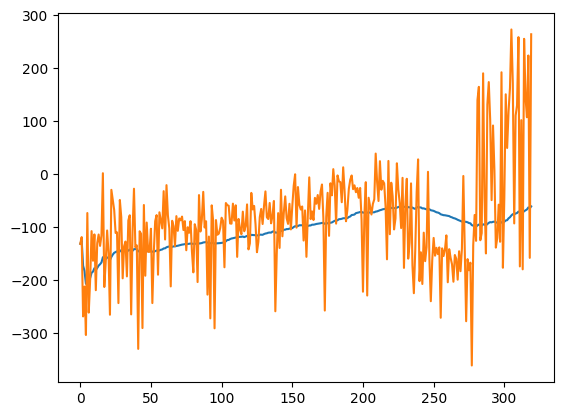

Episode nb: 320, Steps: 453, Score: 146.24, Mean_of_last_scores: -58.98, Total_steps: 93980, Current reward: 100.00
Episode nb: 321, Steps: 279, Score: 286.09, Mean_of_last_scores: -55.70, Total_steps: 94259, Current reward: 100.00
Episode nb: 322, Steps: 952, Score: 141.12, Mean_of_last_scores: -53.25, Total_steps: 95211, Current reward: 100.00
Episode nb: 323, Steps: 514, Score: 187.49, Mean_of_last_scores: -50.54, Total_steps: 95725, Current reward: 100.00
Episode nb: 324, Steps: 888, Score: -275.23, Mean_of_last_scores: -53.50, Total_steps: 96613, Current reward: -100.00
Episode nb: 325, Steps: 416, Score: 241.06, Mean_of_last_scores: -50.80, Total_steps: 97029, Current reward: 100.00
Episode nb: 326, Steps: 336, Score: 244.80, Mean_of_last_scores: -47.82, Total_steps: 97365, Current reward: 100.00
Episode nb: 327, Steps: 431, Score: 221.95, Mean_of_last_scores: -44.58, Total_steps: 97796, Current reward: 100.00
Episode nb: 328, Steps: 639, Score: 146.49, Mean_of_last_scores: -43.0

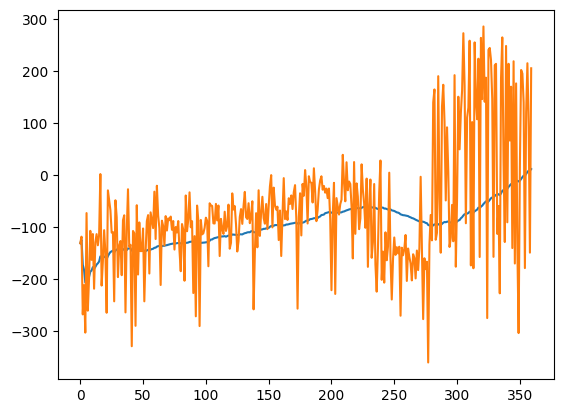

Episode nb: 360, Steps: 1001, Score: -111.07, Mean_of_last_scores: 12.55, Total_steps: 121102, Current reward: -100.00
Episode nb: 361, Steps: 292, Score: 192.42, Mean_of_last_scores: 15.89, Total_steps: 121394, Current reward: 100.00
Episode nb: 362, Steps: 293, Score: 248.89, Mean_of_last_scores: 19.95, Total_steps: 121687, Current reward: 100.00
Episode nb: 363, Steps: 368, Score: 223.57, Mean_of_last_scores: 23.89, Total_steps: 122055, Current reward: 100.00
Episode nb: 364, Steps: 1001, Score: -104.57, Mean_of_last_scores: 24.87, Total_steps: 123056, Current reward: -100.00
Episode nb: 365, Steps: 624, Score: 236.42, Mean_of_last_scores: 28.76, Total_steps: 123680, Current reward: 100.00
Episode nb: 366, Steps: 861, Score: 149.64, Mean_of_last_scores: 31.85, Total_steps: 124541, Current reward: 100.00
Episode nb: 367, Steps: 1001, Score: -107.20, Mean_of_last_scores: 32.77, Total_steps: 125542, Current reward: -100.00
Episode nb: 368, Steps: 1001, Score: -179.89, Mean_of_last_scor

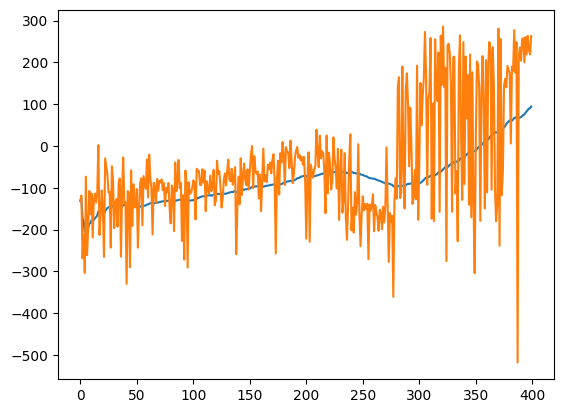

Episode nb: 400, Steps: 232, Score: 222.67, Mean_of_last_scores: 97.22, Total_steps: 144475, Current reward: 100.00
Episode nb: 401, Steps: 310, Score: 224.67, Mean_of_last_scores: 97.96, Total_steps: 144785, Current reward: 100.00
Episode nb: 402, Steps: 1001, Score: -108.72, Mean_of_last_scores: 96.37, Total_steps: 145786, Current reward: -100.00
Episode nb: 403, Steps: 485, Score: 259.30, Mean_of_last_scores: 97.78, Total_steps: 146271, Current reward: 100.00
Episode nb: 404, Steps: 448, Score: 224.44, Mean_of_last_scores: 98.39, Total_steps: 146719, Current reward: 100.00
Episode nb: 405, Steps: 308, Score: 185.59, Mean_of_last_scores: 97.52, Total_steps: 147027, Current reward: 100.00
Episode nb: 406, Steps: 368, Score: 229.53, Mean_of_last_scores: 98.09, Total_steps: 147395, Current reward: 100.00
Episode nb: 407, Steps: 251, Score: 245.43, Mean_of_last_scores: 101.47, Total_steps: 147646, Current reward: 100.00
Episode nb: 408, Steps: 334, Score: 246.82, Mean_of_last_scores: 102

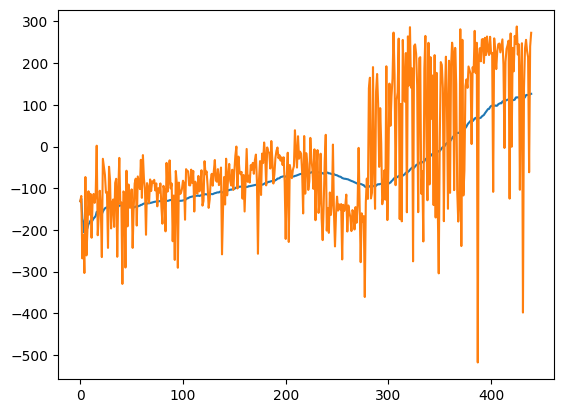

Episode nb: 440, Steps: 240, Score: 242.21, Mean_of_last_scores: 129.64, Total_steps: 160749, Current reward: 100.00
Episode nb: 441, Steps: 360, Score: 245.29, Mean_of_last_scores: 129.95, Total_steps: 161109, Current reward: 100.00
Episode nb: 442, Steps: 573, Score: 230.73, Mean_of_last_scores: 131.59, Total_steps: 161682, Current reward: 100.00
Episode nb: 443, Steps: 192, Score: -62.31, Mean_of_last_scores: 129.26, Total_steps: 161874, Current reward: -100.00
Episode nb: 444, Steps: 1001, Score: -87.48, Mean_of_last_scores: 129.79, Total_steps: 162875, Current reward: -100.00
Episode nb: 445, Steps: 243, Score: -58.00, Mean_of_last_scores: 127.02, Total_steps: 163118, Current reward: -100.00
Episode nb: 446, Steps: 1001, Score: -11.97, Mean_of_last_scores: 128.60, Total_steps: 164119, Current reward: -100.00
Episode nb: 447, Steps: 359, Score: -4.82, Mean_of_last_scores: 126.79, Total_steps: 164478, Current reward: -100.00
Episode nb: 448, Steps: 211, Score: 269.25, Mean_of_last_s

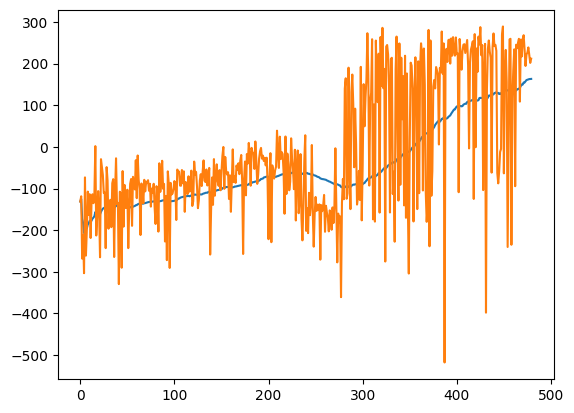

Episode nb: 480, Steps: 257, Score: 242.83, Mean_of_last_scores: 164.07, Total_steps: 177725, Current reward: 100.00
Episode nb: 481, Steps: 632, Score: 169.79, Mean_of_last_scores: 165.71, Total_steps: 178357, Current reward: 100.00
Episode nb: 482, Steps: 331, Score: 230.04, Mean_of_last_scores: 166.11, Total_steps: 178688, Current reward: 100.00
Episode nb: 483, Steps: 434, Score: 244.91, Mean_of_last_scores: 166.77, Total_steps: 179122, Current reward: 100.00
Episode nb: 484, Steps: 304, Score: 246.11, Mean_of_last_scores: 166.45, Total_steps: 179426, Current reward: 100.00
Episode nb: 485, Steps: 413, Score: 221.70, Mean_of_last_scores: 166.91, Total_steps: 179839, Current reward: 100.00
Episode nb: 486, Steps: 352, Score: 252.05, Mean_of_last_scores: 166.95, Total_steps: 180191, Current reward: 100.00
Episode nb: 487, Steps: 285, Score: 232.45, Mean_of_last_scores: 174.45, Total_steps: 180476, Current reward: 100.00
Episode nb: 488, Steps: 326, Score: 212.68, Mean_of_last_scores:

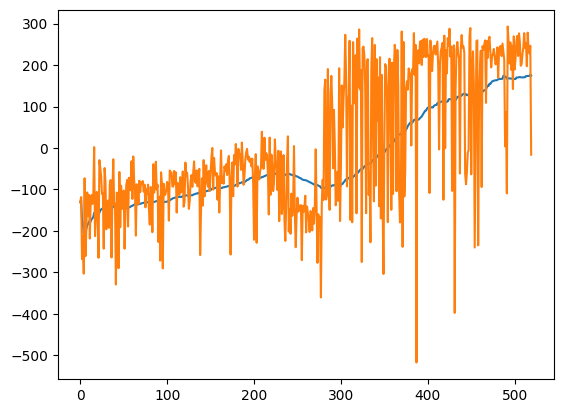

Episode nb: 520, Steps: 272, Score: 215.76, Mean_of_last_scores: 176.59, Total_steps: 194264, Current reward: 100.00
Episode nb: 521, Steps: 377, Score: 266.04, Mean_of_last_scores: 176.89, Total_steps: 194641, Current reward: 100.00
Episode nb: 522, Steps: 208, Score: -2.20, Mean_of_last_scores: 175.06, Total_steps: 194849, Current reward: -100.00
Episode nb: 523, Steps: 390, Score: 233.48, Mean_of_last_scores: 174.75, Total_steps: 195239, Current reward: 100.00
Episode nb: 524, Steps: 265, Score: 227.09, Mean_of_last_scores: 174.56, Total_steps: 195504, Current reward: 100.00
Episode nb: 525, Steps: 258, Score: 234.41, Mean_of_last_scores: 174.03, Total_steps: 195762, Current reward: 100.00
Episode nb: 526, Steps: 790, Score: 192.84, Mean_of_last_scores: 173.75, Total_steps: 196552, Current reward: 100.00
Episode nb: 527, Steps: 283, Score: 256.05, Mean_of_last_scores: 173.86, Total_steps: 196835, Current reward: 100.00
Episode nb: 528, Steps: 343, Score: 262.20, Mean_of_last_scores:

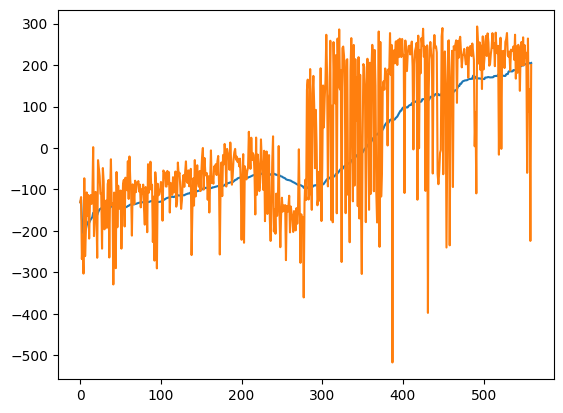

Episode nb: 560, Steps: 424, Score: 159.21, Mean_of_last_scores: 204.84, Total_steps: 210996, Current reward: 100.00
Episode nb: 561, Steps: 362, Score: 226.93, Mean_of_last_scores: 204.77, Total_steps: 211358, Current reward: 100.00
Episode nb: 562, Steps: 352, Score: 218.74, Mean_of_last_scores: 207.90, Total_steps: 211710, Current reward: 100.00
Episode nb: 563, Steps: 347, Score: -231.88, Mean_of_last_scores: 203.12, Total_steps: 212057, Current reward: -100.00
Episode nb: 564, Steps: 464, Score: 220.88, Mean_of_last_scores: 202.96, Total_steps: 212521, Current reward: 100.00
Episode nb: 565, Steps: 404, Score: 244.63, Mean_of_last_scores: 202.92, Total_steps: 212925, Current reward: 100.00
Episode nb: 566, Steps: 362, Score: 212.34, Mean_of_last_scores: 202.44, Total_steps: 213287, Current reward: 100.00
Episode nb: 567, Steps: 332, Score: 230.64, Mean_of_last_scores: 203.66, Total_steps: 213619, Current reward: 100.00
Episode nb: 568, Steps: 390, Score: 209.92, Mean_of_last_score

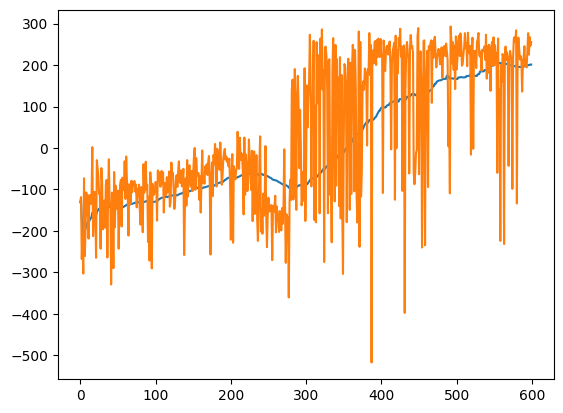

Episode nb: 600, Steps: 273, Score: 227.06, Mean_of_last_scores: 201.63, Total_steps: 226345, Current reward: 100.00
Episode nb: 601, Steps: 287, Score: 234.77, Mean_of_last_scores: 201.83, Total_steps: 226632, Current reward: 100.00
Episode nb: 602, Steps: 326, Score: 229.38, Mean_of_last_scores: 201.56, Total_steps: 226958, Current reward: 100.00
Episode nb: 603, Steps: 508, Score: 228.68, Mean_of_last_scores: 201.14, Total_steps: 227466, Current reward: 100.00
Episode nb: 604, Steps: 576, Score: 215.78, Mean_of_last_scores: 201.08, Total_steps: 228042, Current reward: 100.00
Episode nb: 605, Steps: 442, Score: 210.27, Mean_of_last_scores: 200.42, Total_steps: 228484, Current reward: 100.00
Episode nb: 606, Steps: 369, Score: 191.83, Mean_of_last_scores: 199.79, Total_steps: 228853, Current reward: 100.00
Episode nb: 607, Steps: 567, Score: 201.41, Mean_of_last_scores: 199.82, Total_steps: 229420, Current reward: 100.00
Episode nb: 608, Steps: 552, Score: 185.35, Mean_of_last_scores:

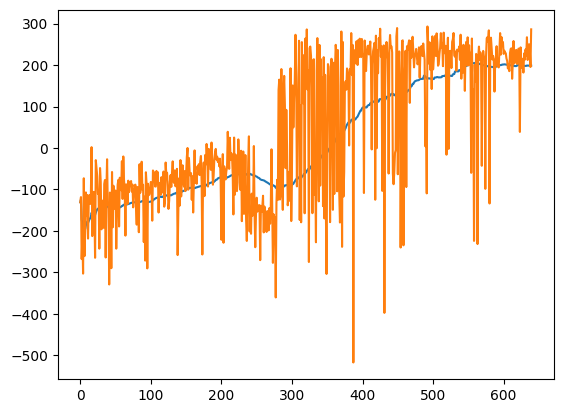

Episode nb: 640, Steps: 321, Score: 267.27, Mean_of_last_scores: 199.75, Total_steps: 243771, Current reward: 100.00
Episode nb: 641, Steps: 289, Score: 213.22, Mean_of_last_scores: 199.43, Total_steps: 244060, Current reward: 100.00
Episode nb: 642, Steps: 468, Score: 234.49, Mean_of_last_scores: 199.96, Total_steps: 244528, Current reward: 100.00
Episode nb: 643, Steps: 640, Score: 205.54, Mean_of_last_scores: 199.53, Total_steps: 245168, Current reward: 100.00
Episode nb: 644, Steps: 368, Score: 262.57, Mean_of_last_scores: 199.83, Total_steps: 245536, Current reward: 100.00
Episode nb: 645, Steps: 345, Score: 225.28, Mean_of_last_scores: 200.70, Total_steps: 245881, Current reward: 100.00
Episode nb: 646, Steps: 440, Score: 198.95, Mean_of_last_scores: 200.29, Total_steps: 246321, Current reward: 100.00
Episode nb: 647, Steps: 347, Score: 241.10, Mean_of_last_scores: 200.14, Total_steps: 246668, Current reward: 100.00
Episode nb: 648, Steps: 553, Score: 215.89, Mean_of_last_scores:

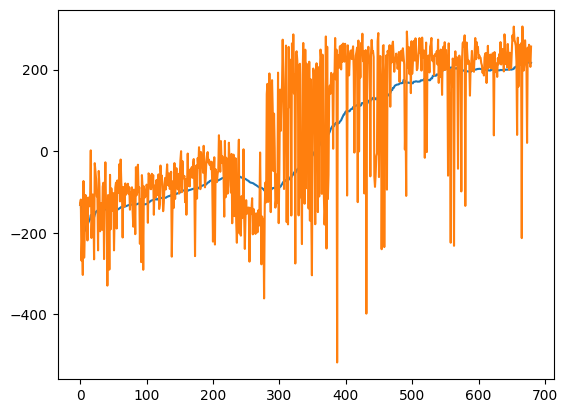

Episode nb: 680, Steps: 590, Score: 230.06, Mean_of_last_scores: 219.93, Total_steps: 260154, Current reward: 100.00
Episode nb: 681, Steps: 345, Score: 227.95, Mean_of_last_scores: 219.94, Total_steps: 260499, Current reward: 100.00
Episode nb: 682, Steps: 389, Score: 247.93, Mean_of_last_scores: 219.76, Total_steps: 260888, Current reward: 100.00
Episode nb: 683, Steps: 636, Score: -238.48, Mean_of_last_scores: 214.96, Total_steps: 261524, Current reward: -100.00
Episode nb: 684, Steps: 367, Score: 230.17, Mean_of_last_scores: 215.12, Total_steps: 261891, Current reward: 100.00
Episode nb: 685, Steps: 344, Score: 235.92, Mean_of_last_scores: 215.26, Total_steps: 262235, Current reward: 100.00
Episode nb: 686, Steps: 509, Score: -196.96, Mean_of_last_scores: 211.18, Total_steps: 262744, Current reward: -100.00
Episode nb: 687, Steps: 533, Score: 202.39, Mean_of_last_scores: 211.84, Total_steps: 263277, Current reward: 100.00
Episode nb: 688, Steps: 408, Score: 242.89, Mean_of_last_sco

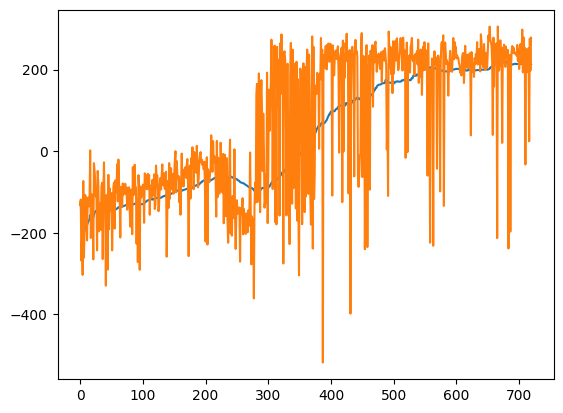

Episode nb: 720, Steps: 401, Score: 231.78, Mean_of_last_scores: 213.18, Total_steps: 275884, Current reward: 100.00
Episode nb: 721, Steps: 459, Score: 257.22, Mean_of_last_scores: 213.35, Total_steps: 276343, Current reward: 100.00
Episode nb: 722, Steps: 421, Score: 250.73, Mean_of_last_scores: 213.47, Total_steps: 276764, Current reward: 100.00
Episode nb: 723, Steps: 398, Score: 222.43, Mean_of_last_scores: 215.31, Total_steps: 277162, Current reward: 100.00
Episode nb: 724, Steps: 641, Score: 257.84, Mean_of_last_scores: 215.46, Total_steps: 277803, Current reward: 100.00
Episode nb: 725, Steps: 278, Score: 254.30, Mean_of_last_scores: 216.07, Total_steps: 278081, Current reward: 100.00
Episode nb: 726, Steps: 259, Score: 284.40, Mean_of_last_scores: 216.76, Total_steps: 278340, Current reward: 100.00
Episode nb: 727, Steps: 1001, Score: 56.37, Mean_of_last_scores: 215.22, Total_steps: 279341, Current reward: -100.00
Episode nb: 728, Steps: 451, Score: 246.82, Mean_of_last_scores

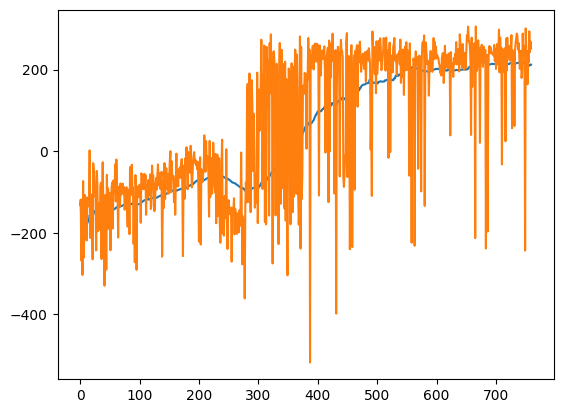

Episode nb: 760, Steps: 358, Score: 252.73, Mean_of_last_scores: 212.97, Total_steps: 292166, Current reward: 100.00
Episode nb: 761, Steps: 339, Score: 289.35, Mean_of_last_scores: 213.28, Total_steps: 292505, Current reward: 100.00
Episode nb: 762, Steps: 230, Score: 275.34, Mean_of_last_scores: 213.43, Total_steps: 292735, Current reward: 100.00
Episode nb: 763, Steps: 365, Score: 251.45, Mean_of_last_scores: 213.83, Total_steps: 293100, Current reward: 100.00
Episode nb: 764, Steps: 530, Score: 245.67, Mean_of_last_scores: 213.64, Total_steps: 293630, Current reward: 100.00
Episode nb: 765, Steps: 489, Score: 191.02, Mean_of_last_scores: 217.68, Total_steps: 294119, Current reward: 100.00
Episode nb: 766, Steps: 224, Score: 262.02, Mean_of_last_scores: 217.25, Total_steps: 294343, Current reward: 100.00
Episode nb: 767, Steps: 392, Score: 224.67, Mean_of_last_scores: 217.42, Total_steps: 294735, Current reward: 100.00
Episode nb: 768, Steps: 226, Score: 242.35, Mean_of_last_scores:

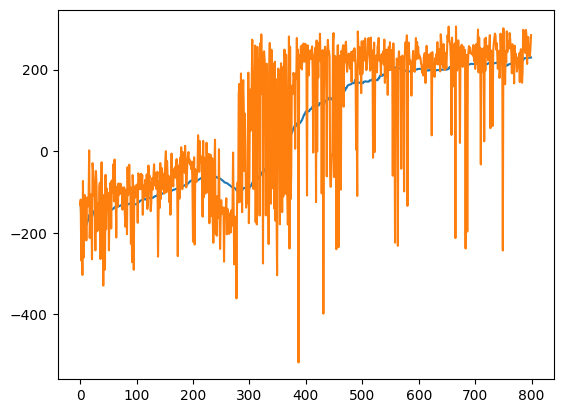

Episode nb: 800, Steps: 250, Score: 247.98, Mean_of_last_scores: 229.94, Total_steps: 306858, Current reward: 100.00
Episode nb: 801, Steps: 324, Score: 239.71, Mean_of_last_scores: 230.01, Total_steps: 307182, Current reward: 100.00
Episode nb: 802, Steps: 286, Score: 269.06, Mean_of_last_scores: 230.08, Total_steps: 307468, Current reward: 100.00
Episode nb: 803, Steps: 328, Score: 259.09, Mean_of_last_scores: 230.53, Total_steps: 307796, Current reward: 100.00
Episode nb: 804, Steps: 255, Score: 244.23, Mean_of_last_scores: 230.49, Total_steps: 308051, Current reward: 100.00
Episode nb: 805, Steps: 585, Score: 220.83, Mean_of_last_scores: 229.72, Total_steps: 308636, Current reward: 100.00
Episode nb: 806, Steps: 607, Score: 227.84, Mean_of_last_scores: 230.07, Total_steps: 309243, Current reward: 100.00
Episode nb: 807, Steps: 363, Score: 237.33, Mean_of_last_scores: 229.66, Total_steps: 309606, Current reward: 100.00
Episode nb: 808, Steps: 398, Score: 232.52, Mean_of_last_scores:

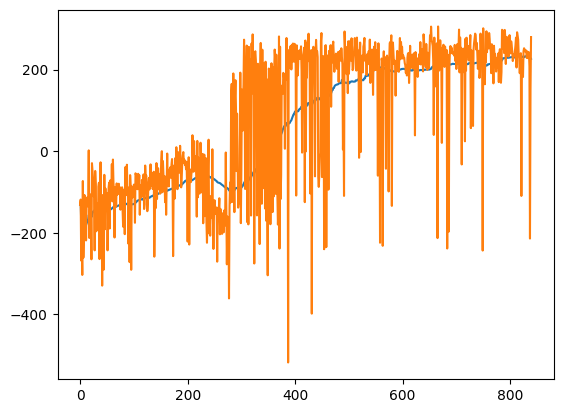

Episode nb: 840, Steps: 345, Score: 265.66, Mean_of_last_scores: 227.06, Total_steps: 323532, Current reward: 100.00
Episode nb: 841, Steps: 284, Score: 280.32, Mean_of_last_scores: 227.79, Total_steps: 323816, Current reward: 100.00
Episode nb: 842, Steps: 273, Score: 246.17, Mean_of_last_scores: 227.79, Total_steps: 324089, Current reward: 100.00
Episode nb: 843, Steps: 363, Score: 228.08, Mean_of_last_scores: 228.28, Total_steps: 324452, Current reward: 100.00
Episode nb: 844, Steps: 358, Score: 258.56, Mean_of_last_scores: 228.95, Total_steps: 324810, Current reward: 100.00
Episode nb: 845, Steps: 377, Score: 221.95, Mean_of_last_scores: 228.29, Total_steps: 325187, Current reward: 100.00
Episode nb: 846, Steps: 461, Score: 240.51, Mean_of_last_scores: 228.27, Total_steps: 325648, Current reward: 100.00
Episode nb: 847, Steps: 269, Score: 257.90, Mean_of_last_scores: 228.26, Total_steps: 325917, Current reward: 100.00
Episode nb: 848, Steps: 354, Score: 231.82, Mean_of_last_scores:

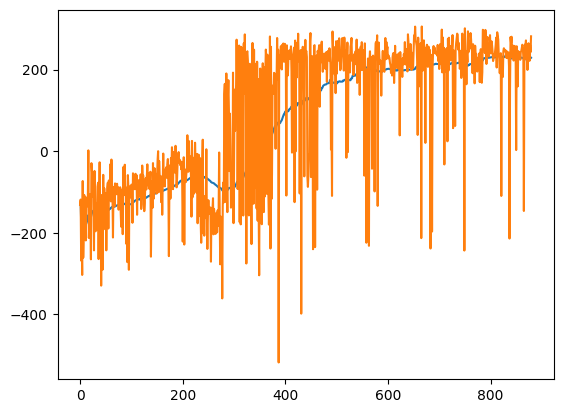

Episode nb: 880, Steps: 536, Score: 230.13, Mean_of_last_scores: 228.67, Total_steps: 339462, Current reward: 100.00
Episode nb: 881, Steps: 369, Score: 224.83, Mean_of_last_scores: 228.42, Total_steps: 339831, Current reward: 100.00
Episode nb: 882, Steps: 351, Score: 201.74, Mean_of_last_scores: 228.01, Total_steps: 340182, Current reward: 100.00
Episode nb: 883, Steps: 443, Score: 211.02, Mean_of_last_scores: 228.44, Total_steps: 340625, Current reward: 100.00
Episode nb: 884, Steps: 332, Score: 235.51, Mean_of_last_scores: 228.86, Total_steps: 340957, Current reward: 100.00
Episode nb: 885, Steps: 620, Score: 261.16, Mean_of_last_scores: 228.50, Total_steps: 341577, Current reward: 100.00
Episode nb: 886, Steps: 381, Score: 264.13, Mean_of_last_scores: 228.18, Total_steps: 341958, Current reward: 100.00
Episode nb: 887, Steps: 572, Score: 171.56, Mean_of_last_scores: 227.38, Total_steps: 342530, Current reward: 100.00
Episode nb: 888, Steps: 354, Score: 219.26, Mean_of_last_scores:

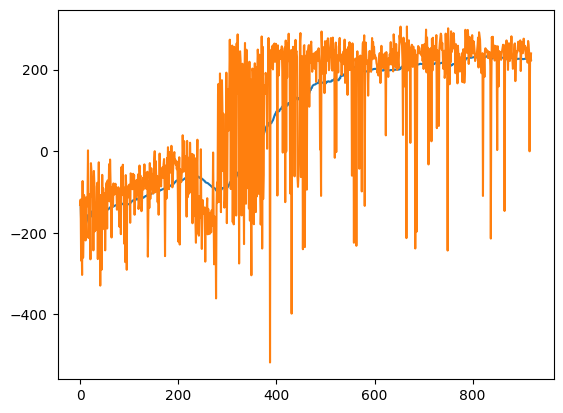

Episode nb: 920, Steps: 846, Score: 165.25, Mean_of_last_scores: 222.74, Total_steps: 355749, Current reward: 100.00
Episode nb: 921, Steps: 285, Score: 259.47, Mean_of_last_scores: 226.43, Total_steps: 356034, Current reward: 100.00
Episode nb: 922, Steps: 437, Score: 236.24, Mean_of_last_scores: 226.67, Total_steps: 356471, Current reward: 100.00
Episode nb: 923, Steps: 442, Score: 233.98, Mean_of_last_scores: 226.77, Total_steps: 356913, Current reward: 100.00
Episode nb: 924, Steps: 557, Score: 201.13, Mean_of_last_scores: 226.97, Total_steps: 357470, Current reward: 100.00
Episode nb: 925, Steps: 500, Score: 240.95, Mean_of_last_scores: 226.92, Total_steps: 357970, Current reward: 100.00
Episode nb: 926, Steps: 353, Score: 257.15, Mean_of_last_scores: 226.98, Total_steps: 358323, Current reward: 100.00
Episode nb: 927, Steps: 352, Score: 271.71, Mean_of_last_scores: 227.20, Total_steps: 358675, Current reward: 100.00
Episode nb: 928, Steps: 484, Score: 241.63, Mean_of_last_scores:

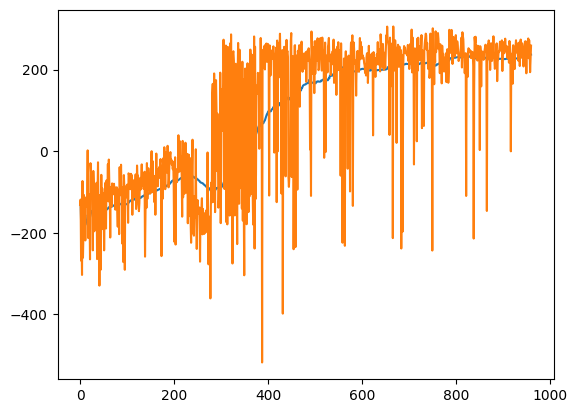

Episode nb: 960, Steps: 466, Score: -624.56, Mean_of_last_scores: 228.02, Total_steps: 370807, Current reward: -100.00
Episode nb: 961, Steps: 300, Score: 278.14, Mean_of_last_scores: 228.26, Total_steps: 371107, Current reward: 100.00
Episode nb: 962, Steps: 477, Score: 250.63, Mean_of_last_scores: 228.16, Total_steps: 371584, Current reward: 100.00
Episode nb: 963, Steps: 216, Score: 247.09, Mean_of_last_scores: 228.12, Total_steps: 371800, Current reward: 100.00
Episode nb: 964, Steps: 241, Score: 281.13, Mean_of_last_scores: 228.63, Total_steps: 372041, Current reward: 100.00
Episode nb: 965, Steps: 419, Score: 242.51, Mean_of_last_scores: 232.52, Total_steps: 372460, Current reward: 100.00
Episode nb: 966, Steps: 516, Score: 202.59, Mean_of_last_scores: 232.38, Total_steps: 372976, Current reward: 100.00
Episode nb: 967, Steps: 545, Score: 237.97, Mean_of_last_scores: 232.15, Total_steps: 373521, Current reward: 100.00
Episode nb: 968, Steps: 421, Score: 265.18, Mean_of_last_score

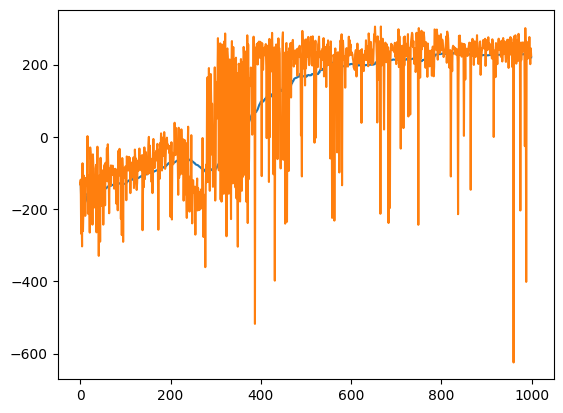

Episode nb: 1000, Steps: 338, Score: 270.70, Mean_of_last_scores: 220.02, Total_steps: 385473, Current reward: 100.00


In [9]:

counter = 0
steps = 0
frames = []
score = 0
scores = []
total_steps = 0
mean_scores_100_episodes = []
TERMINATE = False
PLOT = True

while counter <= EPISODES_TO_PLAY:
    
    # gathering experience
    starting_state = torch.tensor(starting_state, dtype=torch.float)
    if counter % 100 == 0 and counter > 0:
        save_visuals(agent.env, frames)
        
    if counter % 40 == 0 and PLOT:
        plt.close('all')
        plt.plot(mean_scores_100_episodes)
        plt.plot(scores)
        plt.show()
        PLOT = False
    
    action = agent.compute_action(starting_state)
    exp_s = agent.make_step(action, starting_state)

    if steps >= 1000:
        TERMINATE = True
        exp_s.reward = -100
        exp_s.terminated = True
    # print(f'State: {exp_s.state}')
    # print(f'Reward: {exp_s.reward}')
    exp.append(exp_s)
    starting_state = exp_s.state
    steps += 1
    score += exp_s.reward

    if exp_s.terminated or TERMINATE:
        scores.append(score)
        mean = sum(scores[-100:])/(100 if len(scores) >= 100 else len(scores))
        mean_scores_100_episodes.append(mean)
        print(f'Episode nb: {counter}, Steps: {steps}, Score: {score:.2f}, Mean_of_last_scores: {mean:.2f}, Total_steps: {total_steps}, Current reward: {exp_s.reward:0.2f}')
        counter +=1
        steps = 0
        score = 0
        if frames:
            save_frames_as_gif(counter, frames)
            frames = []
            
        
        starting_state, _ = agent.env.reset() 
        TERMINATE = False 
        PLOT = True
    
    # train agent
    if len(exp) >= SAMPLE_SIZE:
        samples = exp.get_samples(SAMPLE_SIZE)
        agent.train_agent(samples)
    
    #synchronization
    agent.synchronize(total_steps)
    total_steps +=1
        